## K Means Clustering Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,90000
1,Michael,29,61000
2,Mohan,29,60000
3,Ismail,28,150000
4,Kory,42,155000


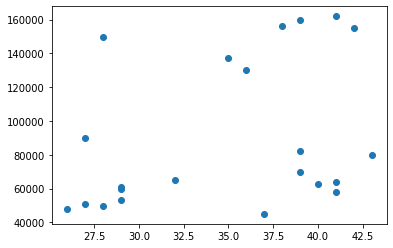

In [3]:
plt.scatter(df.Age, df.Income)

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted = km.fit_predict(df[['Age', 'Income']])
y_predicted

array([2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2],
      dtype=int32)

In [6]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Rob,27,90000,2
1,Michael,29,61000,0
2,Mohan,29,60000,0
3,Ismail,28,150000,1
4,Kory,42,155000,1


Text(0, 0.5, 'Income($)')

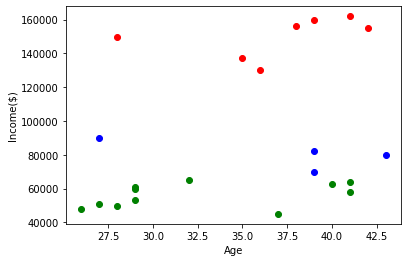

In [9]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1.Age, df1['Income'],color='green')
plt.scatter(df2.Age, df2['Income'],color='red')
plt.scatter(df3.Age, df3['Income'],color='blue')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [12]:
df.shape

(22, 4)

Due to improper feature scaling, there is an error in the above clustering as can be seen

In [22]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
# print(scaler.transform(df[['Income']]))
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df

,Name,Age,Income,cluster
0,Rob,0.058824,0.384615,2
1,Michael,0.176471,0.136752,0
2,Mohan,0.176471,0.128205,0
3,Ismail,0.117647,0.897436,1
4,Kory,0.941176,0.940171,1
5,Gautam,0.764706,0.982906,1
6,David,0.882353,1.000000,1
7,Andrea,0.705882,0.948718,1
8,Brad,0.588235,0.726496,1
9,Angelina,0.529412,0.786325,1


In [24]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [25]:
df['cluster'] = y_predicted
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.384615,0
1,Michael,0.176471,0.136752,0
2,Mohan,0.176471,0.128205,0
3,Ismail,0.117647,0.897436,1
4,Kory,0.941176,0.940171,1
5,Gautam,0.764706,0.982906,1
6,David,0.882353,1.000000,1
7,Andrea,0.705882,0.948718,1
8,Brad,0.588235,0.726496,1
9,Angelina,0.529412,0.786325,1


Text(0, 0.5, 'Income')

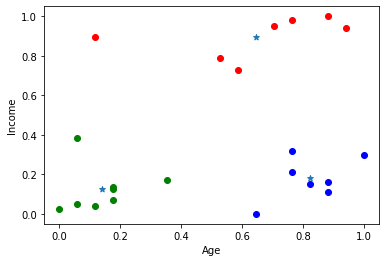

In [29]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1.Income,color='green')
plt.scatter(df2.Age,df2.Income,color='red')
plt.scatter(df3.Age, df3.Income, color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], marker='*')
plt.xlabel('Age')
plt.ylabel('Income')

In [27]:
km.cluster_centers_

array([[0.13970588, 0.12553419],
       [0.64705882, 0.8974359 ],
       [0.82352941, 0.17948718]])

## Elbow Method

In [30]:
k_rng = range(1,10)
sse = []
for k in k_rng:
  km =KMeans(n_clusters=k)
  km.fit(df[['Age','Income']])
  sse.append(km.inertia_)

In [31]:
sse

[5.434011511988177,
 2.603647116287225,
 0.8470184162087055,
 0.5099551034333885,
 0.3669384970151317,
 0.2827499010845653,
 0.20883279895346263,
 0.15081660798544838,
 0.1152003566119439]

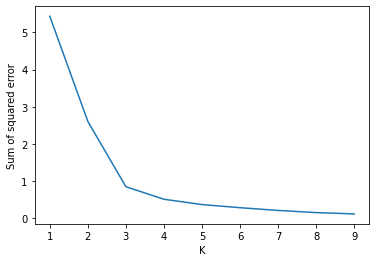

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Therefore, k=3 from the elbow method